In [3]:
# загрузка необходимых для построения моделей библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
# загрузка выборки
sample = pd.read_excel('02_sample.xlsx',index_col='NaturalPersonID')

In [29]:
# отображение атрибутов в выборке
sample.sample(10, random_state=123)

,target,sex,age,AddressIdentical,EducationStatus,FamilyStatus,otrasl_rabotodatelya,OrgStanding,PeriodOfRegionResidence,segment
NaturalPersonID,,,,,,,,,,
9924E5F4-6D45-4340-AB4F-2CC45F913222,0,0.055869,34,0.041482,0.052190,0.032718,0.050810,13.000000,17.000000,0.067883
BED3918B-BB5C-4A3D-8025-7AA1ACFA1706,0,0.035119,28,0.041482,0.041504,0.032718,0.063487,2.000000,2.000000,0.029851
418EB843-9BA2-4DF1-9DFE-83BA4890CC8B,0,0.035119,25,0.041482,0.041504,0.069458,0.041667,2.500000,20.000000,0.029851
D7113FA2-209D-4E56-9F4F-EC8178049A57,0,0.035119,61,0.041482,0.050053,0.051397,0.026961,16.000000,38.000000,0.029851
88F3C3A6-8F33-4CE7-BD69-847DF2DF5C97,0,0.055869,26,0.081023,0.050053,0.069458,0.063487,1.500000,23.250000,0.067883
42BE6809-B38D-4D18-ABEA-4694CDFD413D,1,0.055869,35,0.041482,0.050053,0.032718,0.032864,2.000000,9.000000,0.067883
734928A5-355E-4EA3-A2AB-FF4FE52C6B62,0,0.055869,30,0.041482,0.041504,0.032718,0.073286,1.083333,16.166666,0.067883
D1B5A177-A4DC-4922-A3CE-1ADD83AC003E,0,0.055869,48,0.081023,0.050053,0.032718,0.050810,1.166667,13.166666,0.029851
BA81BE20-5848-48BB-BFAD-ECB09F8233B1,0,0.035119,44,0.041482,0.050053,0.051397,0.030660,23.833333,44.000000,0.029851


In [32]:
# проведение транспонирования
sample.describe().T

,count,mean,std,min,25%,50%,75%,max
target,17055.0,0.046966,0.211572,0.000000,0.000000,0.000000,0.000000,1.000000
sex,17055.0,0.046966,0.010271,0.035119,0.035119,0.055869,0.055869,0.055869
age,17055.0,38.896394,11.654409,18.000000,29.000000,38.000000,49.000000,63.000000
AddressIdentical,17055.0,0.046966,0.013496,0.041482,0.041482,0.041482,0.041482,0.081023
EducationStatus,17055.0,0.046966,0.005267,0.020000,0.041504,0.050053,0.050053,0.058824
FamilyStatus,17055.0,0.046966,0.017684,0.000000,0.032718,0.032718,0.069458,0.088235
otrasl_rabotodatelya,17055.0,0.046966,0.017221,0.000000,0.032864,0.050810,0.061822,0.100000
OrgStanding,17055.0,5.931247,7.068956,0.083333,1.500000,3.250000,7.166667,45.000000
PeriodOfRegionResidence,17055.0,25.308526,15.412928,0.083333,13.000000,23.666666,35.000000,63.833333
segment,17055.0,0.046966,0.018921,0.029851,0.029851,0.029851,0.067883,0.067883


In [34]:
# проверка на пропуски и типа переменных
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17055 entries, 96D8120D-F0FE-4D51-BE4A-2CEB9C3918C8 to 9CE86398-7D9D-4352-BA05-A9E67671CAF4
Data columns (total 10 columns):
target                     17055 non-null int64
sex                        17055 non-null float64
age                        17055 non-null int64
AddressIdentical           17055 non-null float64
EducationStatus            17055 non-null float64
FamilyStatus               17055 non-null float64
otrasl_rabotodatelya       17055 non-null float64
OrgStanding                17055 non-null float64
PeriodOfRegionResidence    17055 non-null float64
segment                    17055 non-null float64
dtypes: float64(8), int64(2)
memory usage: 1.4+ MB


In [37]:
#распределение дефолт и не дефолт
sample['target'].value_counts()

0    16254
1      801
Name: target, dtype: int64

In [39]:
# проверка размерности выбобрки (количества записей и количество атрибутов)
sample.shape

(17055, 10)

In [40]:
Y = sample['target']
X = sample.drop(['target'], axis=1)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [42]:
#Вывод списка всех признаков
x_train.columns.values

array(['sex', 'age', 'AddressIdentical', 'EducationStatus',
       'FamilyStatus', 'otrasl_rabotodatelya', 'OrgStanding',
       'PeriodOfRegionResidence', 'segment'], dtype=object)

In [43]:
#вывод значения AUC для каждого признака
for i in ['sex', 'age', 'AddressIdentical', 'EducationStatus',
       'FamilyStatus', 'otrasl_rabotodatelya', 'OrgStanding',
       'PeriodOfRegionResidence', 'segment']:
    #случаи-исключения, для них надо использоват 1-AUC
    if i in ['age','OrgStanding','PeriodOfRegionResidence']:
        print('VarAUC',i,':',1-roc_auc_score(y_train,x_train[i]))
    else:
        print('VarAUC',i,':',roc_auc_score(y_train,x_train[i]))

VarAUC sex : 0.5524505431887721
VarAUC age : 0.6196249396112825
VarAUC AddressIdentical : 0.5520199251799274
VarAUC EducationStatus : 0.5353085863465754
VarAUC FamilyStatus : 0.6024902603837626
VarAUC otrasl_rabotodatelya : 0.6105207984936886
VarAUC OrgStanding : 0.6314405341459487
VarAUC PeriodOfRegionResidence : 0.6237213076170302
VarAUC segment : 0.5989610043727626


In [44]:
logrg=LogisticRegression(solver='newton-cg',penalty='none')
logrg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
logrg.coef_

array([[ 1.68371015e+01, -2.47855498e-03,  1.11153679e+01,
         3.60589816e+01,  1.45401548e+01,  1.91470175e+01,
        -6.58376795e-02, -1.80750091e-02,  1.42714547e+01]])

In [46]:
print('AUC train:',roc_auc_score(y_train,logrg.predict_proba(x_train)[:,1]))
print('AUC test:',roc_auc_score(y_test,logrg.predict_proba(x_test)[:,1]))

AUC train: 0.7282789525189838
AUC test: 0.7119542484349352


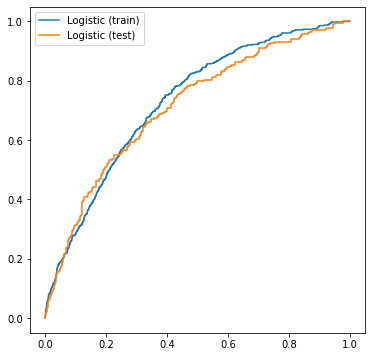

In [77]:
fpr1,tpr1,_=roc_curve(y_train,logrg.predict_proba(x_train)[:,1])
fpr2,tpr2,_=roc_curve(y_test,logrg.predict_proba(x_test)[:,1])
pyplot.figure(figsize=(6,6))
pyplot.plot(fpr1,tpr1,label='Logistic (train)')
pyplot.plot(fpr2,tpr2,label='Logistic (test)')
pyplot.legend()
pyplot.show()


In [80]:
parametrs={'criterion':['gini','entropy'],'min_samples_leaf':range(200,1010,10)}
grid=GridSearchCV(DecisionTreeClassifier(),parametrs,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 200}

In [81]:
tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=200,random_state=1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [82]:
print('AUC train:',roc_auc_score(y_train,tree.predict_proba(x_train)[:,1]))
print('AUC test:',roc_auc_score(y_test,tree.predict_proba(x_test)[:,1]))

AUC train: 0.7521344314789351
AUC test: 0.6738091974143476


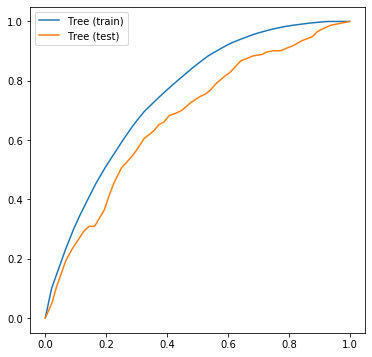

In [83]:
fpr1,tpr1,_=roc_curve(y_train,tree.predict_proba(x_train)[:,1])
fpr2,tpr2,_=roc_curve(y_test,tree.predict_proba(x_test)[:,1])
pyplot.figure(figsize=(6,6))
pyplot.plot(fpr1,tpr1,label='Tree (train)')
pyplot.plot(fpr2,tpr2,label='Tree (test)')
pyplot.legend()
pyplot.show()

In [84]:
parametrs={'n_estimators':[10,25,50,100],'max_depth':[3,4,5],'min_samples_leaf':range(200,510,10)}
grid=GridSearchCV(GradientBoostingClassifier(),parametrs,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 260, 'n_estimators': 100}

In [85]:
gbst=GradientBoostingClassifier(n_estimators=100,max_depth=3,min_samples_leaf=260)
gbst.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=260, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [86]:
print('AUC train:',roc_auc_score(y_train,gbst.predict_proba(x_train)[:,1]))
print('AUC test:',roc_auc_score(y_test,gbst.predict_proba(x_test)[:,1]))

AUC train: 0.7923686467972302
AUC test: 0.7170431258414092


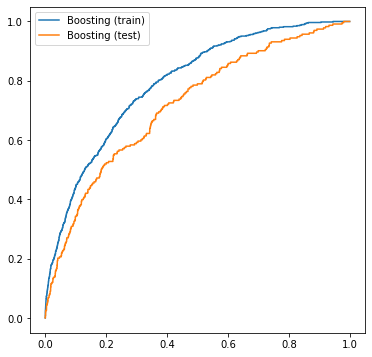

In [87]:
fpr1,tpr1,_=roc_curve(y_train,gbst.predict_proba(x_train)[:,1])
fpr2,tpr2,_=roc_curve(y_test,gbst.predict_proba(x_test)[:,1])
pyplot.figure(figsize=(6,6))
pyplot.plot(fpr1,tpr1,label='Boosting (train)')
pyplot.plot(fpr2,tpr2,label='Boosting (test)')
pyplot.legend()
pyplot.show()